In [1]:
 !curl ipinfo.io

{
  "ip": "34.86.116.131",
  "hostname": "131.116.86.34.bc.googleusercontent.com",
  "city": "Washington",
  "region": "Washington, D.C.",
  "country": "US",
  "loc": "38.8951,-77.0364",
  "org": "AS396982 Google LLC",
  "postal": "20004",
  "timezone": "America/New_York",
  "readme": "https://ipinfo.io/missingauth"
}

In [2]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.regularizers import l1,l2,l1_l2
from tensorflow.keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, Normalizer
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import datetime as dt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

th=dt.datetime.now()


In [3]:
#! pip install category_encoders

In [4]:
#from category_encoders import OrdinalEncoder

In [5]:
! pip install plot_keras_history

In [6]:
! pip install pyyaml h5py

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [8]:
from plot_keras_history import show_history, plot_history, chain_histories
import matplotlib.pyplot as plt


=======================<br>
load the dataset

In [ ]:
from google.colab import files
from google.colab import drive
#drive.mount('/content/drive/')
#%cd /content/drive/My Drive/Colab_2024/
#%ls


In [18]:
uploaded=files.upload()

Saving Airlinessat.csv to Airlinessat.csv


In [12]:
def load_dataset(filename):
 # load the dataset as a pandas DataFrame
 df = pd.read_csv(filename,index_col=0)
 df = df.drop(df.iloc[:,[0]],axis=1)

 # for only one column
 clm=list(df.columns[df.isna().sum()>0])
 value=df[clm].median()
 df.replace(np.nan,value,inplace=True)

 cat_cols=[col for col in df.columns if df[col].dtype=="object"]
 ord_cols= [col for col in df.columns if min(df[col]) in {0,1} and max(df[col])==5]
 cont_cols= [col for col in df.columns if col not in ord_cols + cat_cols]
 columns=df.columns
 # retrieve numpy array
 dfset = df.values
 # split into input (X) and output (y) variables
 X = dfset[:, :-1]
 y = dfset[:,-1]
 # format all fields as string
 #X = X.astype(str)
 return X, y,columns,cat_cols[:-1],ord_cols,cont_cols


Transform data using embeedings

In [13]:
def transf_dataset(X,cols,cat_cols,ord_cols,cont_cols):
    """ transformation using embedding to numerical datasets"""
    df_comb_cols=[]
    X=pd.DataFrame(X,columns=cols[:-1])
    # categorical
    df_cat=X[cat_cols]
    df_cat_enc = pd.get_dummies(df_cat,columns=cat_cols,dtype='int')
    df_comb_cols.extend(df_cat_enc.columns)
    # ordinal
    df_ord=X[ord_cols]
    ord_mapping = lambda x:x
    df_ord_map = df_ord.applymap(ord_mapping)
    df_ord_enc =pd.get_dummies(df_ord_map,columns=ord_cols, dtype='int')
    df_comb_cols.extend(df_ord_enc.columns)
    # continuous
    df_cont=X[cont_cols]
    df_cont_scaled = scaler.fit_transform(df_cont)
    df_comb_cols.extend(df_cont.columns)
    # combined
    df_comb = np.hstack((df_cat_enc,df_ord_enc,df_cont_scaled))
    return df_comb, df_comb_cols


prepare input data

In [14]:
def prepare_inputs(X_train, X_test):
 no = Normalizer()
 X_train_enc =no.transform(X_train)
 X_test_enc= no.transform(X_test)
 return X_train_enc, X_test_enc

prepare target

In [15]:
def prepare_targets(y_train, y_test):
 le = LabelEncoder()
 le.fit(y_train)
 y_train_enc = le.transform(y_train)
 y_test_enc = le.transform(y_test)
 return y_train_enc, y_test_enc

load the dataset

In [19]:
X, y,feature_names_in,nominal_cols,ordinal_cols, numerical_cols = load_dataset('Airlinessat.csv')
print(list(feature_names_in))

['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']


In [20]:

X,Xcols=transf_dataset(X,feature_names_in,nominal_cols,ordinal_cols, numerical_cols)


In [21]:
print (pd.DataFrame(X, columns=Xcols).head(5))

   Gender_Female  Gender_Male  Customer Type_Loyal Customer  \
0            0.0          1.0                           1.0   
1            0.0          1.0                           0.0   
2            1.0          0.0                           1.0   
3            1.0          0.0                           1.0   
4            0.0          1.0                           1.0   

   Customer Type_disloyal Customer  Type of Travel_Business travel  \
0                              0.0                             0.0   
1                              1.0                             1.0   
2                              0.0                             1.0   
3                              0.0                             1.0   
4                              0.0                             1.0   

   Type of Travel_Personal Travel  Class_Business  Class_Eco  Class_Eco Plus  \
0                             1.0             0.0        0.0             1.0   
1                             0.0       

split into train and test sets

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1,shuffle=True)

prepare input data

In [23]:
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

prepare output data

In [24]:
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [25]:
#X_train_enc, X_val_enc, y_train_enc, y_val_enc = train_test_split(X_train_enc_0, y_train_enc_0, test_size=0.05, random_state=1)

-rint("==================================================")

In [26]:
input_dim=len(Xcols)

In [27]:
print(input_dim)

96


In [28]:
  #activity_regularizer=l1_l2 (l1=0.001,l2=0.00001)

In [29]:
checkpoint = ModelCheckpoint("airlinesat.h5", monitor = 'val_accuracy', save_best_only=True)


Define the model

In [30]:
def create_model():
  model = Sequential()
  model.add(Dense(units=input_dim, activation='relu',activity_regularizer=l1_l2(l1=0.1,l2=0.000000001), input_dim=input_dim))
  #model.add(Dense(units=0.5*input_dim,activation='relu'))
  model.add(Dense(units=1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [31]:
model = create_model( )

Train the model on the training data using an appropriate loss function, optimizer, and evaluation metric.

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 96)                9312      
                                                                 
 dense_1 (Dense)             (None, 1)                 97        
                                                                 
Total params: 9409 (36.75 KB)
Trainable params: 9409 (36.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Training the model

In [33]:
ind={}

def training_model(time_start,model,train,test,epochs,batch_size,callbacks,out_model,ind):
      import pandas as pd
      history0=model.fit(train[0],train[1],epochs=epochs,batch_size=batch_size,validation_data=test,callbacks=callbacks)
      history=chain_histories(ind,history0)

      # plot_history
      plot_history(history, path="interpolated.png", interpolate=True)
      # Evaluate the model
      loss, accuracy = model.evaluate(test[0], test[1])
      print(f'Accuracy: {accuracy}')
      ind =history
      # save model and history
      out=out_model+str(time_start)+".h5"
      model.save(out)
      hist_csv_file='history'+str(time_start) + '.csv'
      history.to_csv(hist_csv_file,index=False)
      return files.download(hist_csv_file), files.download(out),ind


In [34]:
train=[X_train_enc,y_train_enc]

In [35]:
test=[X_test_enc,y_test_enc]


In [43]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=70)

In [37]:
callbacks=[checkpoint,es]

Epoch 1/50
1827/1827 [==============================] - 5s 2ms/step - loss: 0.4699 - accuracy: 0.8563 - val_loss: 0.3330 - val_accuracy: 0.9262
Epoch 2/50
  78/1827 [>.............................] - ETA: 3s - loss: 0.3323 - accuracy: 0.9279

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1827/1827 [==============================] - 4s 2ms/step - loss: 0.2988 - accuracy: 0.9306 - val_loss: 0.2725 - val_accuracy: 0.9334
Epoch 3/50
1827/1827 [==============================] - 5s 3ms/step - loss: 0.2563 - accuracy: 0.9357 - val_loss: 0.2418 - val_accuracy: 0.9355
Epoch 4/50
1827/1827 [==============================] - 4s 2ms/step - loss: 0.2299 - accuracy: 0.9373 - val_loss: 0.2200 - val_accuracy: 0.9379
Epoch 5/50
1827/1827 [==============================] - 4s 2ms/step - loss: 0.2116 - accuracy: 0.9393 - val_loss: 0.2050 - val_accuracy: 0.9413
Epoch 6/50
1827/1827 [==============================] - 5s 3ms/step - loss: 0.1988 - accuracy: 0.9412 - val_loss: 0.1950 - val_accuracy: 0.9413
Epoch 7/50
1827/1827 [==============================] - 4s 2ms/step - loss: 0.1890 - accuracy: 0.9441 - val_loss: 0.1842 - val_accuracy: 0.9499
Epoch 8/50
1827/1827 [==============================] - 4s 2ms/step - loss: 0.1791 - accuracy: 0.9525 - val_loss: 0.1758 - val_accuracy: 0.9533
Epo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

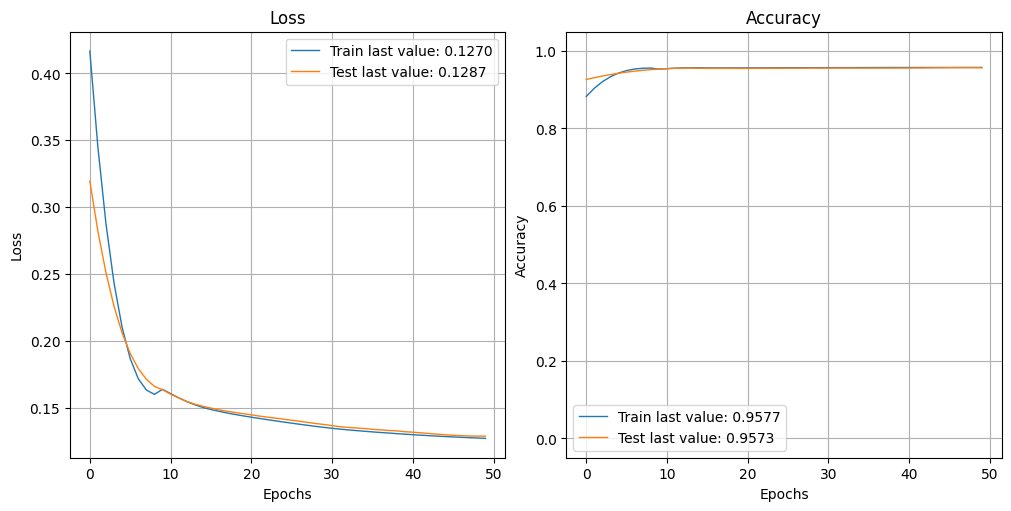

In [38]:
for ii in range(1):
  th=dt.datetime.now()
  _,_,ind_new=training_model(th,model,train,test,50,64,callbacks,"airlinessat",ind)
  ind = ind_new

Evaluate the model's performance on the testing set using metrics such as accuracy, precision, recall, and F1 score.

Epoch 1/50
1827/1827 [==============================] - 4s 2ms/step - loss: 0.1268 - accuracy: 0.9576 - val_loss: 0.1277 - val_accuracy: 0.9573
Epoch 2/50
1827/1827 [==============================] - 4s 2ms/step - loss: 0.1265 - accuracy: 0.9577 - val_loss: 0.1277 - val_accuracy: 0.9570
Epoch 3/50
1827/1827 [==============================] - 4s 2ms/step - loss: 0.1263 - accuracy: 0.9577 - val_loss: 0.1275 - val_accuracy: 0.9569
Epoch 4/50
1827/1827 [==============================] - 5s 3ms/step - loss: 0.1261 - accuracy: 0.9576 - val_loss: 0.1303 - val_accuracy: 0.9560
Epoch 5/50
1827/1827 [==============================] - 4s 2ms/step - loss: 0.1260 - accuracy: 0.9575 - val_loss: 0.1262 - val_accuracy: 0.9573
Epoch 6/50
1827/1827 [==============================] - 4s 2ms/step - loss: 0.1256 - accuracy: 0.9574 - val_loss: 0.1286 - val_accuracy: 0.9557
Epoch 7/50
1827/1827 [==============================] - 5s 3ms/step - loss: 0.1256 - accuracy: 0.9580 - val_loss: 0.1267 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

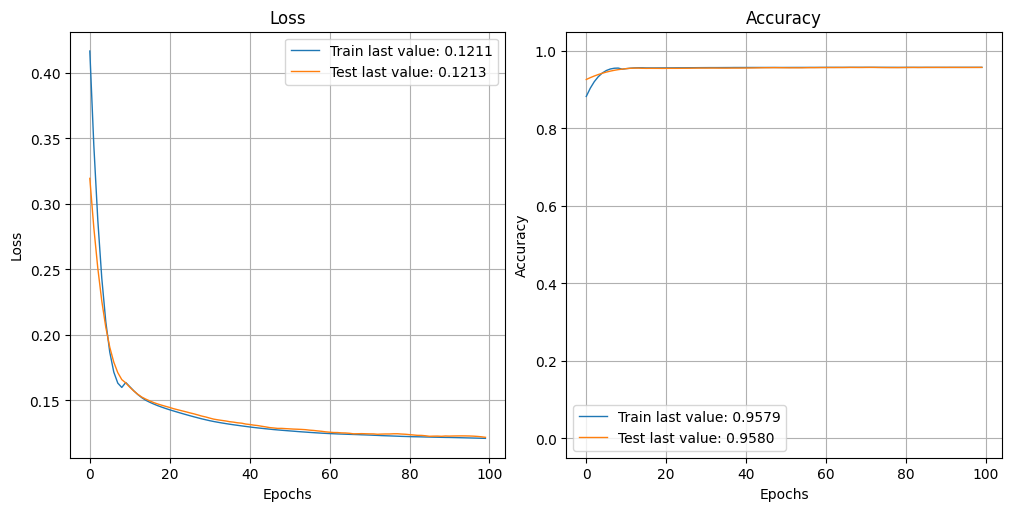

In [44]:
for ii in range(1):
  th=dt.datetime.now()
  _,_,ind_new=training_model(th,model,train,test,50,64,callbacks,"airlinessat",ind)
  ind = ind_new

Epoch 1/50
1827/1827 [==============================] - 5s 3ms/step - loss: 0.1210 - accuracy: 0.9577 - val_loss: 0.1206 - val_accuracy: 0.9588
Epoch 2/50
1827/1827 [==============================] - 4s 2ms/step - loss: 0.1211 - accuracy: 0.9578 - val_loss: 0.1212 - val_accuracy: 0.9568
Epoch 3/50
1827/1827 [==============================] - 4s 2ms/step - loss: 0.1210 - accuracy: 0.9573 - val_loss: 0.1236 - val_accuracy: 0.9560
Epoch 4/50
1827/1827 [==============================] - 4s 2ms/step - loss: 0.1209 - accuracy: 0.9580 - val_loss: 0.1209 - val_accuracy: 0.9577
Epoch 5/50
1827/1827 [==============================] - 4s 2ms/step - loss: 0.1208 - accuracy: 0.9578 - val_loss: 0.1223 - val_accuracy: 0.9579
Epoch 6/50
1827/1827 [==============================] - 4s 2ms/step - loss: 0.1208 - accuracy: 0.9576 - val_loss: 0.1232 - val_accuracy: 0.9574
Epoch 7/50
1827/1827 [==============================] - 4s 2ms/step - loss: 0.1208 - accuracy: 0.9579 - val_loss: 0.1195 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

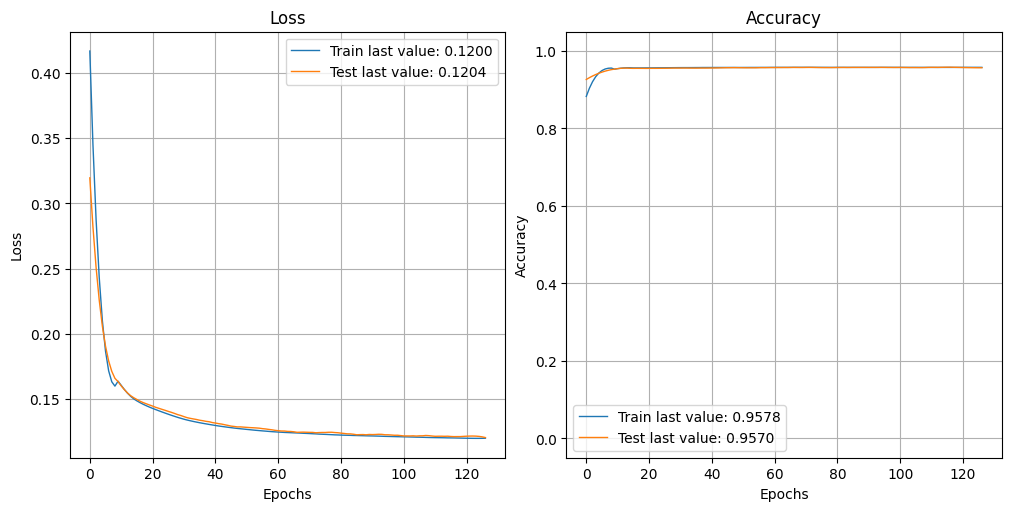

In [45]:
for ii in range(1):
  th=dt.datetime.now()
  _,_,ind_new=training_model(th,model,train,test,50,64,callbacks,"airlinessat",ind)
  ind = ind_new

In [39]:
#plot_history(history, path="interpolated.png", interpolate=True)

In [40]:
#loss, accuracy = model.evaluate(X_test_enc, y_test_enc)

In [41]:
#print(f'Accuracy: {accuracy}')

Fine-Tuning:

Experiment with hyperparameter tuning, adjusting the neural network architecture, or using techniques like dropout to improve model performance.

Predictions:

</br> The trained model to make predictions on new or unseen data.<br>
Make predictions

In [42]:
#predictions = model.predict(X_new_data)

nterpretability (Optional):

epending on the complexity of the model, consider techniques or tools for interpreting and explaining model predictions, such as SHAP (SHapley Additive exPlanations) values.